graph-toolでcsv形式のリンクリストを読み込む 「 url:https://qiita.com/yohm/items/73c1b614315ee5a115fc 」

In [2]:
import csv

data = [
    ['Alice', 'Bob', '2'],
    ['Bob', 'Charlie', '5'],
    ['Charlie', 'Alice', '3']
]

filename = 'link_list.csv'

with open(filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)

print('データがCSVファイルに保存されました。')


データがCSVファイルに保存されました。


In [3]:
import csv
import graph_tool.all as gt

nodes = set()
rows = []

with open('link_list.csv') as f:
    reader = csv.reader(f)
    rows = [row for row in reader]

for row in rows:
    nodes.add(row[0])
    nodes.add(row[1])

nodes = list(nodes)
g = gt.Graph()
g.vp['name'] = g.new_vp('string')

for n in nodes:
    v = g.add_vertex()
    g.vp['name'][v] = n

# set edges
g.ep['weight'] = g.new_ep('double')

for row in rows:
    s = nodes.index(row[0])
    t = nodes.index(row[1])
    w = float(row[2])
    vs = g.vertex(s)     # => get vertex object from the index
    vt = g.vertex(t)
    e = g.add_edge(vs, vt)
    g.ep['weight'][e] = w

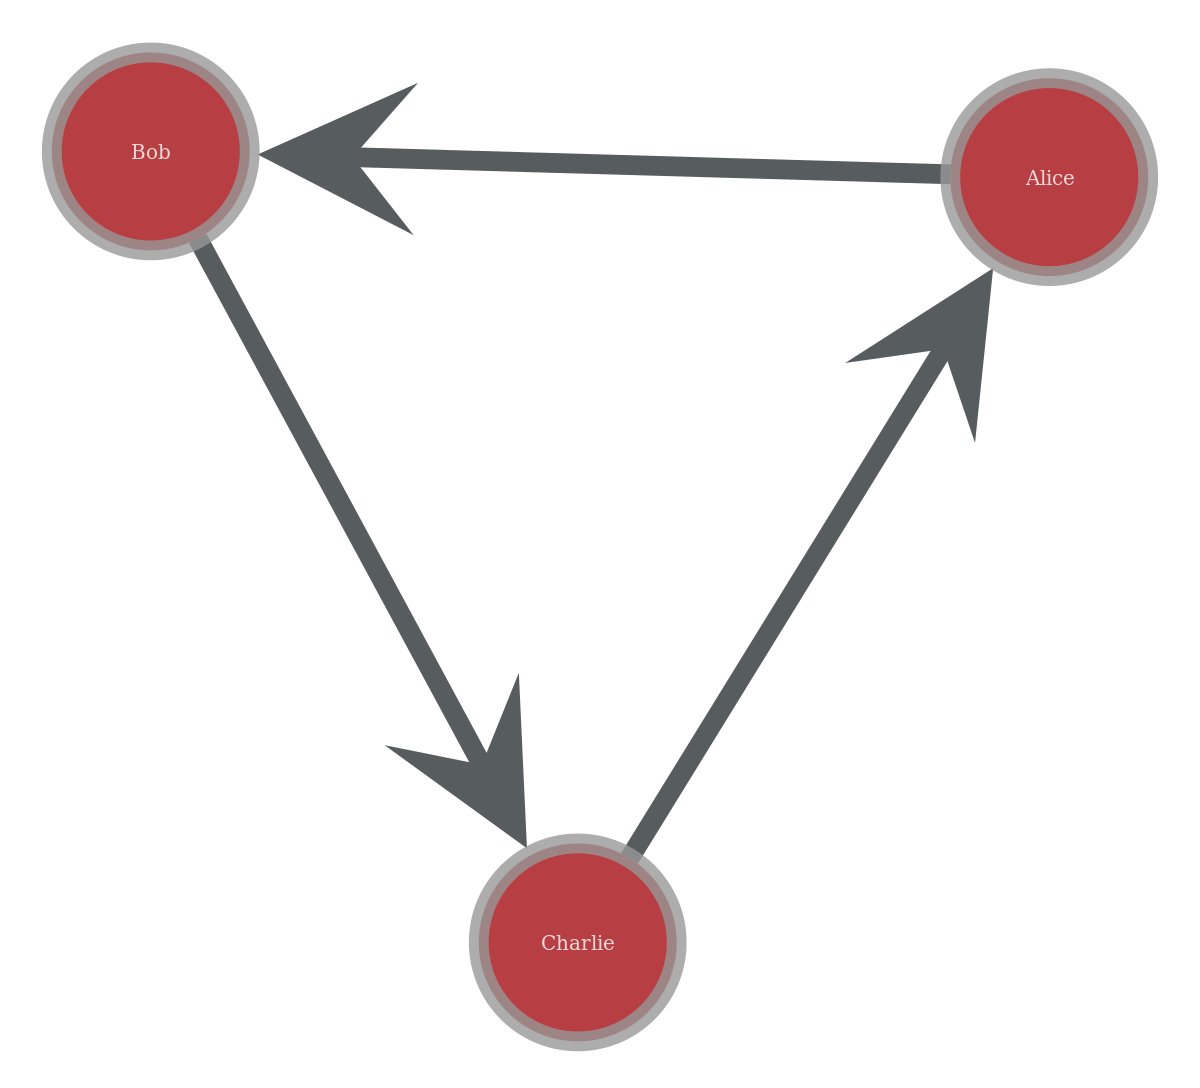

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f181343c510, at 0x7f18940f3150>

In [4]:
pos = gt.arf_layout(g)
gt.graph_draw(g, pos=pos, vertex_text=g.vp.name, vertex_font_size=10)